<a href="https://colab.research.google.com/github/AlisaAlenteva/Iscusstvennye_neyronne_seti/blob/main/4_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

#Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





### Загрузка

In [5]:
# Ваш код #

from keras.datasets import cifar100 # импорт исходного датасета
from keras.models import Sequential
from keras.utils import to_categorical
 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,  AveragePooling2D, BatchNormalization, Activation, Dropout

###Разделение и нормализация

In [6]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [7]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
X_train = x_train.reshape((x_train.shape[0], 
                           x_train.shape[1], 
                           x_train.shape[2], 
                           x_train.shape[3]))
X_train = X_train/ 255.0

In [10]:
X_test = x_test.reshape((x_test.shape[0], 
                         x_test.shape[1], 
                         x_test.shape[2], 
                         x_test.shape[3]))
X_test = X_test/ 255.0

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
y_train.shape

(50000, 100)

In [15]:
y_test.shape

(10000, 100)

## Визуализация

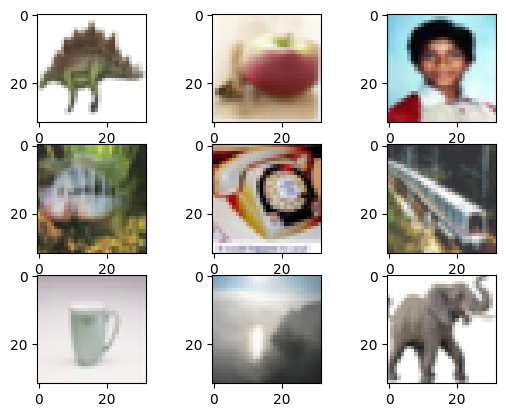

In [16]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
 
plt.show()

# Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [17]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3,3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(32, (3,3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3,3), activation="relu"))
model_1.add(Flatten())
model_1.add(Dense(64, activation="relu"))
model_1.add(Dense(100, activation="softmax"))
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Обучите созданную модель

In [18]:
batch_size = 64
epochs = 5

In [19]:
history = model_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 69s 86ms/step - loss: 4.0642 - accuracy: 0.0751 - val_loss: 3.6605 - val_accuracy: 0.1442
Epoch 2/5
782/782 [==============================] - 68s 87ms/step - loss: 3.4261 - accuracy: 0.1821 - val_loss: 3.2926 - val_accuracy: 0.2106
Epoch 3/5
782/782 [==============================] - 65s 83ms/step - loss: 3.1113 - accuracy: 0.2406 - val_loss: 3.0599 - val_accuracy: 0.2482
Epoch 4/5
782/782 [==============================] - 65s 83ms/step - loss: 2.9135 - accuracy: 0.2802 - val_loss: 2.9310 - val_accuracy: 0.2800
Epoch 5/5
782/782 [==============================] - 66s 85ms/step - loss: 2.7680 - accuracy: 0.3046 - val_loss: 2.7801 - val_accuracy: 0.3134


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [21]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(Activation("relu"))
model_2.add(Dense(100))
model_2.add(BatchNormalization())
model_2.add(Activation("softmax"))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Обучите созданную модель

In [22]:
model_2_history = model_2.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 80s 100ms/step - loss: 3.8322 - accuracy: 0.1364 - val_loss: 3.8453 - val_accuracy: 0.1362
Epoch 2/5
782/782 [==============================] - 78s 99ms/step - loss: 3.1511 - accuracy: 0.2550 - val_loss: 3.0367 - val_accuracy: 0.2647
Epoch 3/5
782/782 [==============================] - 82s 105ms/step - loss: 2.8422 - accuracy: 0.3080 - val_loss: 2.9254 - val_accuracy: 0.2834
Epoch 4/5
782/782 [==============================] - 80s 102ms/step - loss: 2.6433 - accuracy: 0.3464 - val_loss: 2.7482 - val_accuracy: 0.3155
Epoch 5/5
782/782 [==============================] - 81s 104ms/step - loss: 2.5111 - accuracy: 0.3694 - val_loss: 2.7339 - val_accuracy: 0.3234


# Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [23]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3,3), activation="relu"))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3,3), activation="relu"))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3,3), activation="relu"))
model_3.add(Flatten())
model_3.add(Dense(64))
model_3.add(Activation("relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(100))
model_3.add(Activation("softmax"))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Обучите созданную модель

In [24]:
model_3_history = model_3.fit(X_train, y_train,
                              batch_size=64,
                              epochs=5,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 79s 99ms/step - loss: 4.3357 - accuracy: 0.0353 - val_loss: 3.9590 - val_accuracy: 0.1035
Epoch 2/5
782/782 [==============================] - 81s 104ms/step - loss: 3.9082 - accuracy: 0.0921 - val_loss: 3.5912 - val_accuracy: 0.1519
Epoch 3/5
782/782 [==============================] - 77s 98ms/step - loss: 3.6725 - accuracy: 0.1303 - val_loss: 3.3683 - val_accuracy: 0.2037
Epoch 4/5
782/782 [==============================] - 82s 105ms/step - loss: 3.5392 - accuracy: 0.1506 - val_loss: 3.2148 - val_accuracy: 0.2198
Epoch 5/5
782/782 [==============================] - 78s 99ms/step - loss: 3.4300 - accuracy: 0.1689 - val_loss: 3.1358 - val_accuracy: 0.2377


# Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
model_4 = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu',
                  input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(32, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),
  
  
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax')
])

Обучите созданную модель

In [26]:
model_4.compile(
    loss ='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
model_4_history = model_4.fit(X_train, y_train, batch_size=64, epochs=3, verbose=1, validation_data=(X_test, y_test))

Epoch 1/3
782/782 [==============================] - 596s 756ms/step - loss: 3.6613 - accuracy: 0.1513 - val_loss: 3.3082 - val_accuracy: 0.1996
Epoch 2/3
782/782 [==============================] - 589s 753ms/step - loss: 2.7574 - accuracy: 0.3032 - val_loss: 3.1749 - val_accuracy: 0.2434
Epoch 3/3
782/782 [==============================] - 629s 805ms/step - loss: 2.3524 - accuracy: 0.3876 - val_loss: 2.7154 - val_accuracy: 0.3337


# Задание 6. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

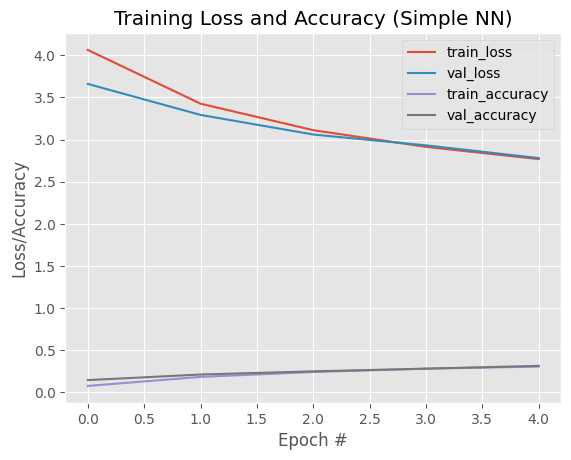

In [28]:
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

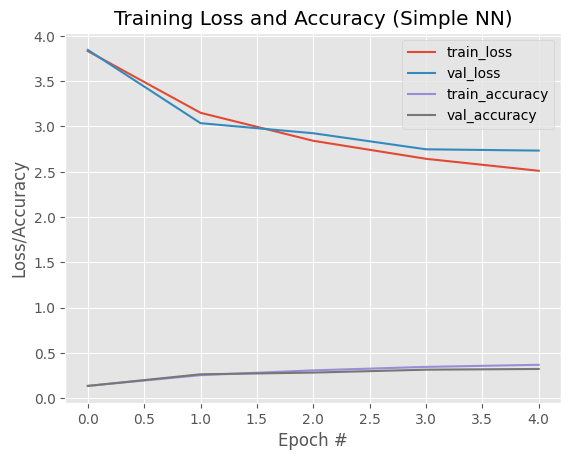

In [29]:
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model_2_history.history["loss"], label="train_loss")
plt.plot(N, model_2_history.history["val_loss"], label="val_loss")
plt.plot(N, model_2_history.history["accuracy"], label="train_accuracy")
plt.plot(N, model_2_history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

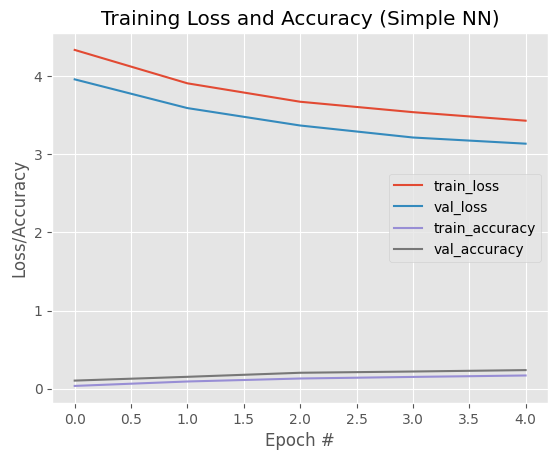

In [30]:
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model_3_history.history["loss"], label="train_loss")
plt.plot(N, model_3_history.history["val_loss"], label="val_loss")
plt.plot(N, model_3_history.history["accuracy"], label="train_accuracy")
plt.plot(N, model_3_history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

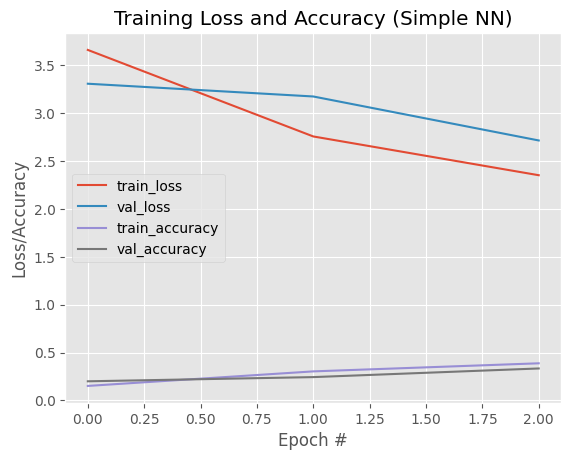

In [32]:
N = np.arange(0, 3)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model_4_history.history["loss"], label="train_loss")
plt.plot(N, model_4_history.history["val_loss"], label="val_loss")
plt.plot(N, model_4_history.history["accuracy"], label="train_accuracy")
plt.plot(N, model_4_history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Наилучшая архитектура - 1 

Самая быстрая - 1

Самая долгая - 4 